# Introduction
As housing prices become more expensive around other Canadian metropolitan cities due to an influx of foreign investors seeking opportunities abroad, taxation on foreign real estate buyers in these hot housing markets makes Montreal an attractive real estate prospect. Because of data constraints, I will be analyzing aggregate housing unit types (sum of condos, row units, single-detatched, etc.)

The Montreal housing data is downloaded from the Open Government Partnership website (https://open.canada.ca) and quandl CMHC datasets. 

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import quandl
from IPython import display

In [17]:
fields = ['REF_DATE', 'GEO', 'Completed dwelling units', 'Type of dwelling unit', 'VALUE']
absorption_data = pd.read_csv(r"real-Estate Data\Absorbtions and unabsorbed inventory.csv", parse_dates=['REF_DATE'], index_col=['REF_DATE'], usecols=fields, encoding='latin-1')

Snippet of data contained in the CSV file: 

In [18]:
absorption_data.head(5)

,GEO,Completed dwelling units,Type of dwelling unit,VALUE
REF_DATE,,,,
1988-06-01,Census metropolitan areas,Absorptions,Total units,7722
1988-06-01,Census metropolitan areas,Absorptions,Single detached units,7161
1988-06-01,Census metropolitan areas,Absorptions,Semi-detached units,561
1988-06-01,Census metropolitan areas,Unabsorbed inventory,Total units,5694
1988-06-01,Census metropolitan areas,Unabsorbed inventory,Single detached units,4932


In [3]:
montreal_total_absorption_data = absorption_data[(absorption_data.GEO == 'Montréal, Quebec') & (absorption_data['Type of dwelling unit'] == 'Total units')]
vancouver_total_absorption_data = absorption_data[(absorption_data.GEO == 'Vancouver, British Columbia') & (absorption_data['Type of dwelling unit'] == 'Total units')]
toronto_total_absorption_data = absorption_data[(absorption_data.GEO == 'Toronto, Ontario') & (absorption_data['Type of dwelling unit'] == 'Total units')]

In [4]:
def MA_average(location_df):
    moving_average_df = pd.DataFrame(index=location_df.groupby(['REF_DATE']).sum().index)
    moving_average_df['Total'] = location_df.groupby(['REF_DATE','Type of dwelling unit']).sum().reset_index(['Type of dwelling unit'])['VALUE']
    moving_average_df['Absorptions'] = location_df[location_df['Completed dwelling units'] == 'Absorptions']['VALUE']
    moving_average_df['Unabsorbed inventory'] = location_df[location_df['Completed dwelling units'] == 'Unabsorbed inventory']['VALUE']
    
    moving_average_df['Absorption %'] = moving_average_df['Absorptions']/moving_average_df['Total']*100
    moving_average_df['Unabsorbed inventory %'] = moving_average_df['Unabsorbed inventory']/moving_average_df['Total']*100
    moving_average_df['MA20 Absorption'] = moving_average_df['Absorption %'].rolling(window=20).mean()
    return moving_average_df

In [5]:
montreal_MA = MA_average(montreal_total_absorption_data)
vancouver_MA = MA_average(vancouver_total_absorption_data)
toronto_MA = MA_average(toronto_total_absorption_data)

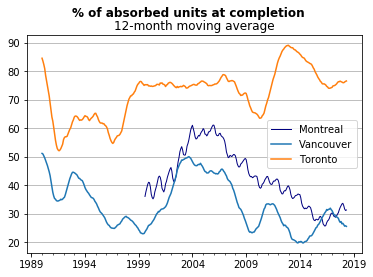

In [12]:
ax1 = montreal_MA['MA20 Absorption'].plot(lw=1, colormap='jet', label='Montreal')
ax1.yaxis.grid()

vancouver_MA['MA20 Absorption'].plot(label='Vancouver')
toronto_MA['MA20 Absorption'].plot(label='Toronto')

plt.suptitle("% of absorbed units at completion", fontweight="bold")
plt.title("12-month moving average")
plt.grid(axis='y')
plt.xlabel("")
plt.legend()
plt.show()

A trend downwards implies that supply outpaces demand (demand is lower than the amount of household units created). Interesting enough, Montreal's 12-month moving average seems to be rebounding from its lowest year (2016) which may indicate an increase in overall demand as buyers from Toronto and Vancouver affected by foreign luxury taxes seek other Canadian opportunities. I used 12-month moving average to smooth out yearly cyclicalities. If the housing starts for households in the Montreal area is also upwards trending then not only are homes being absorbed on completion at an increasing rate, but buyers on average are also buying an increasing amount of households.  

In [19]:
fields = ['REF_DATE', 'GEO', 'Housing estimates', 'Type of unit', 'VALUE']
housingstart_data = pd.read_csv(r"real-Estate Data\Housing Starts.csv", parse_dates=['REF_DATE'], index_col=['REF_DATE'], usecols=fields, encoding='latin-1')

Snippet of data contained in the CSV file:

In [16]:
housingstart_data.head(5)

,GEO,Housing estimates,Type of unit,VALUE
REF_DATE,,,,
1972-01-01,Census metropolitan areas,Housing starts,Total units,7969
1972-01-01,Census metropolitan areas,Housing starts,Single-detached units,3287
1972-01-01,Census metropolitan areas,Housing starts,Semi-detached units,615
1972-01-01,Census metropolitan areas,Housing starts,Row units,734
1972-01-01,Census metropolitan areas,Housing starts,Apartment and other unit types,3333
